In [1]:
import pandas as pd
import numpy as np
import keras as k
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train_1.csv')       # training dataset
data_test = pd.read_csv('test_1.csv')   # testing dataset
data.head()

C:\Users\Vishv Joshi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,5,7,9,11,195,222,236,252,305,313,373,374) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Vishv Joshi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,5,7,9,11,195,222,236,252,305,373,374) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id  label  feature_1 feature_2  feature_3 feature_4  feature_5  \
0  17744_1      0        NaN       NaN        1.0       NaN        1.0   
1  17743_1      0        NaN       NaN        1.0       NaN        1.0   
2  17742_1      0        NaN       NaN        1.0       NaN        1.0   
3  17741_1      0        0.0     Miami        1.0     33175        4.0   
4  17740_1      0        NaN       NaN        NaN       NaN        NaN   

  feature_6  feature_7 feature_8  ...  feature_582 feature_583  feature_584  \
0       NaN        1.0       NaN  ...          NaN         NaN          NaN   
1       NaN        NaN       NaN  ...          NaN         NaN          NaN   
2       NaN        1.0       NaN  ...          NaN         NaN          NaN   
3       NaN        1.0       NaN  ...          NaN         NaN          NaN   
4       NaN        NaN       NaN  ...          NaN         NaN          NaN   

   feature_585  feature_586  feature_587  feature_588  feature_589  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   feature_590  feature_591  
0          NaN          NaN  
1          NaN          NaN  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN  

[5 rows x 593 columns]

In [3]:
# if half or more than half the values are NaN, we remove the feature
for i in data.columns:
    if(data[i].isnull().sum() >= 0.5*len(data.index)):
        data.drop(labels = i, axis = 1, inplace = True)
data

id  label  feature_14  feature_15  feature_16  feature_17  \
0        17744_1      0         1.0         1.0         0.0         0.0   
1        17743_1      0         0.0         0.0         0.0         0.0   
2        17742_1      0         0.0         1.0         0.0         0.0   
3        17741_1      0         0.0         2.0         0.0         0.0   
4        17740_1      0         0.0         0.0         0.0         0.0   
...          ...    ...         ...         ...         ...         ...   
142125  57185_11      1         0.0         0.0         1.0         0.0   
142126  57186_11      1         0.0         0.0         0.0         0.0   
142127  57187_11      1         0.0         0.0         1.0         0.0   
142128  57188_11      1         0.0         1.0         0.0         0.0   
142129  57189_11      1         0.0         0.0         1.0         0.0   

        feature_18  feature_20  feature_21  feature_22  ...  feature_550  \
0              0.0         0.0         0.0         2.0  ...            1   
1              0.0         2.0         2.0         4.0  ...            1   
2              0.0         0.0         0.0         1.0  ...            1   
3              0.0         4.0         2.0         8.0  ...            1   
4              0.0         0.0         0.0         0.0  ...            1   
...            ...         ...         ...         ...  ...          ...   
142125         0.0         1.0         1.0         4.0  ...            1   
142126         3.0         0.0         0.0         6.0  ...            1   
142127         0.0         1.0         1.0         5.0  ...            1   
142128         0.0         0.0         0.0         3.0  ...            1   
142129         0.0         1.0         1.0         4.0  ...            1   

        feature_551  feature_552  feature_553  feature_554  feature_555  \
0                 1            1            0            0            0   
1                 1            1            0            0            0   
2                 1            1            0            0            0   
3                 1            1            0            0            0   
4                 1            1            0            0            0   
...             ...          ...          ...          ...          ...   
142125            1            1            0            0            0   
142126            1            1            0            0            0   
142127            1            1            0            0            0   
142128            1            1            0            0            0   
142129            1            1            0            0            0   

        feature_556  feature_557  feature_558  feature_559  
0                 0            0            0            0  
1                 0            0            0            0  
2                 0            0            0            0  
3                 0            0            0            0  
4                 0            0            0            0  
...             ...          ...          ...          ...  
142125            0            0            0            0  
142126            0            0            0            0  
142127            0            0            0            0  
142128            0            0            0            0  
142129            0            0            0            0  

[142130 rows x 146 columns]

In [4]:
# for an object feature, if 50% or more data in the column is NaN, we remove it
for i in data.columns:
    if((data[i].isnull().sum() >= 0.5*len(data.index)) and isinstance(i, object)):
        data.drop(labels = i, axis = 1, inplace = True)

In [6]:
# fill the rest of the objects with mode of the data
for i in data.select_dtypes(['object']).columns:
    data[i].fillna(value = data[i].mode()[0], inplace = True)

In [7]:
# fill the remaining column NaN with the mean of that column
for i in data.columns:
    if(data[i].isnull().sum()):
        data[i].fillna(value = data[i].mean(), inplace = True)    

In [8]:
# remove id column and assign X and Y for training
data.drop('id', axis = 1, inplace = True)
Y = data["label"]
data.drop('label', axis = 1, inplace = True)
X = data

In [9]:
# dummy variable creation
col = X.select_dtypes(['object']).columns
X[col] = X[col].astype('category')
X[col] = X[col].apply(lambda x: x.cat.codes)

In [10]:
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y)

In [11]:
# Neural network model
model = k.Sequential()
model.add(k.layers.BatchNormalization(input_shape = (X.shape[1],)))
model.add(k.layers.Dense(50, activation = 'relu', kernel_initializer = 'he_uniform'))

model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'))

model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
# Train the model
model.fit(X, Y, batch_size = 32, epochs = 5)

Epoch 1/5
4442/4442 [==============================] - 4s 827us/step - loss: 0.1790 - accuracy: 0.9332
Epoch 2/5
4442/4442 [==============================] - 4s 836us/step - loss: 0.1413 - accuracy: 0.9438
Epoch 3/5
4442/4442 [==============================] - 4s 860us/step - loss: 0.1375 - accuracy: 0.9444
Epoch 4/5
4442/4442 [==============================] - 4s 838us/step - loss: 0.1345 - accuracy: 0.9456
Epoch 5/5
4442/4442 [==============================] - 4s 832us/step - loss: 0.1329 - accuracy: 0.9460


In [13]:
# Get the X_test and Y_test in desired format
Y_test = data_test["label"]
data_test.drop('label', axis = 1, inplace = True)
data_test.drop('id', axis = 1, inplace = True)
X_test = data_test[data.columns]

In [14]:
# dummy variable creation in testing data
col = X_test.select_dtypes(['object']).columns
X_test[col] = X_test[col].astype('category')
X_test[col] = X_test[col].apply(lambda x: x.cat.codes)

C:\Users\Vishv Joshi\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# fill NaN with mean
for i in data.columns:
    if(X_test[i].isnull().sum()):
        X_test[i].fillna(value = X_test[i].mean(), inplace = True)

C:\Users\Vishv Joshi\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
X_test = np.asarray(X_test).astype(np.float32)
Y_test = np.asarray(Y_test)

In [17]:
# Evaluate the model
model.evaluate(X_test, Y_test)

4583/4583 [==============================] - 2s 462us/step - loss: 0.1444 - accuracy: 0.9459


[0.14436931908130646, 0.945941686630249]

In [18]:
# F1 scores
Y_train_pred = model.predict(X)
Y_train_pred = (Y_train_pred > 0.5)
Y_test_pred = model.predict(X_test)
Y_test_pred = (Y_test_pred > 0.5)
print("Train f1 score: " + str(metrics.f1_score(Y, Y_train_pred, average = 'macro')))
print("Test f1 score: " + str(metrics.f1_score(Y_test, Y_test_pred, average = 'macro'))) 

Train f1 score: 0.6987557670083469
Test f1 score: 0.6696369927961552


Text(0.5, 1.0, 'Receiver operating characteristics')

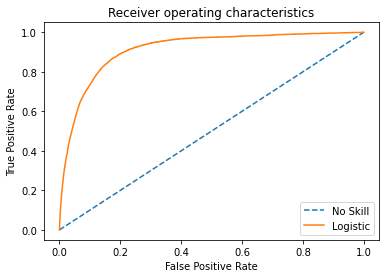

In [19]:
# ROC curve
ns = [0 for _ in range(len(Y_test))]
lr = model.predict(X_test)
ns_fpr, ns_tpr, _ = metrics.roc_curve(Y_test, ns)
lr_fpr, lr_tpr, _ = metrics.roc_curve(Y_test, lr)
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(lr_fpr, lr_tpr, label = 'Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Receiver operating characteristics')

In [20]:
# AUC score
auc_score = metrics.roc_auc_score(Y_test, model.predict(X_test))
round( float( auc_score ), 2 )

0.91